In [2]:
# Step 1: Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 2: Load dataset from the URL
url = "https://raw.githubusercontent.com/Prodigy-InfoTech/data-science-datasets/refs/heads/main/Task%202/train.csv"
df = pd.read_csv(url)

# Step 3: Display basic overview
print("Shape:", df.shape)
print("\nColumns:\n", df.columns.tolist())
print("\nMissing values:\n", df.isnull().sum())
df.head()


Shape: (891, 12)

Columns:
 ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']

Missing values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Step 4: Handle missing values
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Fare'] = df['Fare'].fillna(df['Fare'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Step 5: Drop Cabin due to too many missing values
if 'Cabin' in df.columns:
    df = df.drop(columns=['Cabin'])

# Step 6: Clean categorical text data
df['Sex'] = df['Sex'].str.lower()
df['Embarked'] = df['Embarked'].str.lower()

# Step 7: Feature engineering
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df['IsAlone'] = df['FamilySize'].apply(lambda x: 1 if x == 1 else 0)

print("\nAfter cleaning, dataset shape:", df.shape)
df.head()



After cleaning, dataset shape: (891, 13)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,s,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,c,2,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,s,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,s,2,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,s,1,1


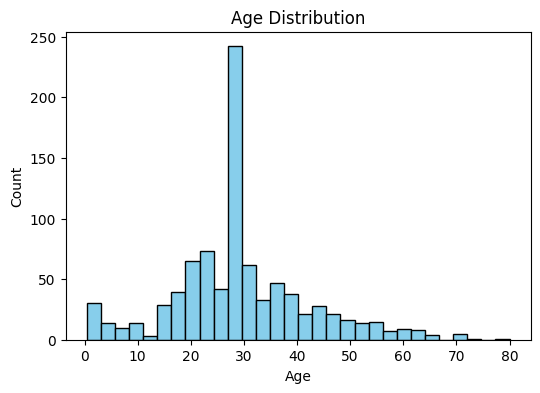

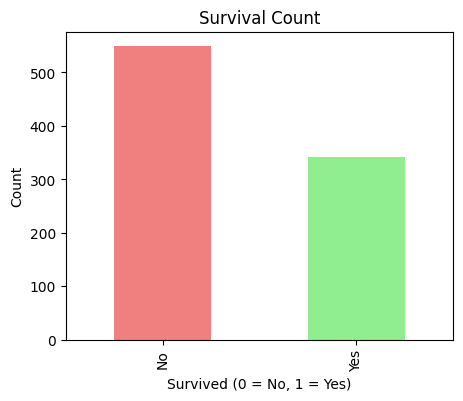

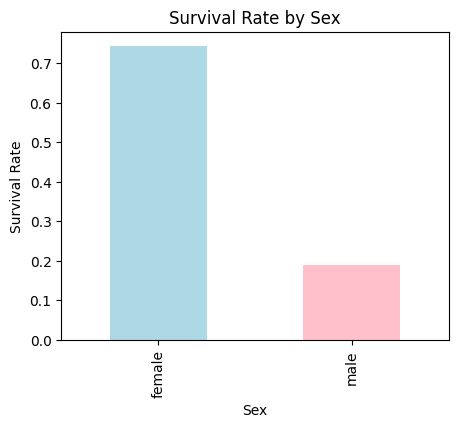

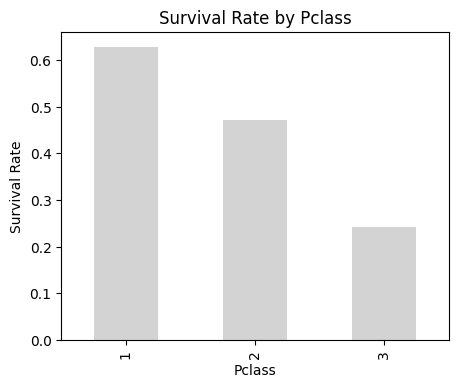

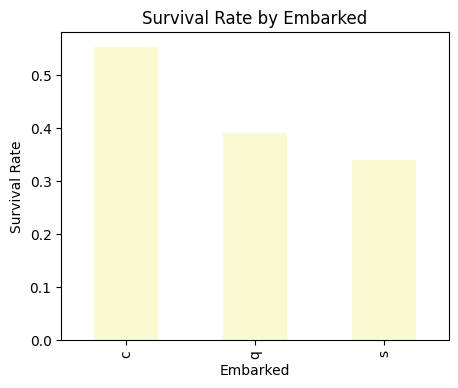

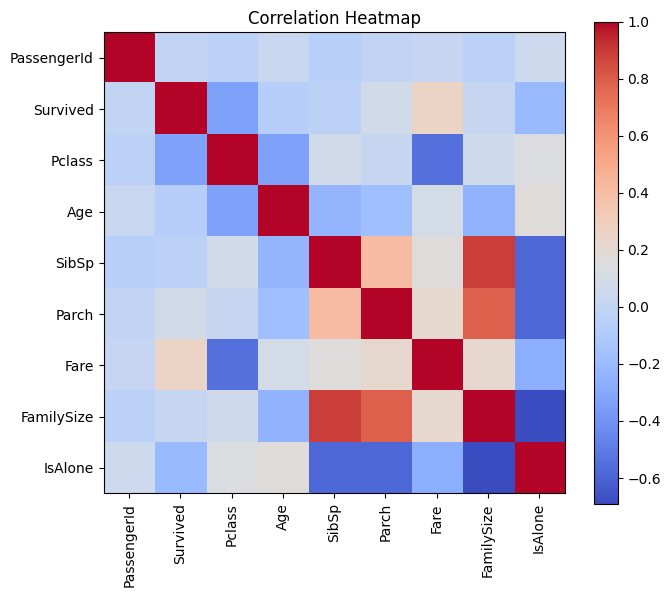

In [4]:
# Distribution of Age
plt.figure(figsize=(6,4))
plt.hist(df['Age'], bins=30, color='skyblue', edgecolor='black')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

# Survival count
plt.figure(figsize=(5,4))
df['Survived'].value_counts(sort=False).plot(kind='bar', color=['lightcoral','lightgreen'])
plt.title("Survival Count")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.xticks(ticks=[0,1], labels=['No','Yes'])
plt.show()

# Survival rate by Sex
plt.figure(figsize=(5,4))
df.groupby('Sex')['Survived'].mean().plot(kind='bar', color=['lightblue','pink'])
plt.title("Survival Rate by Sex")
plt.ylabel("Survival Rate")
plt.show()

# Survival rate by Pclass
plt.figure(figsize=(5,4))
df.groupby('Pclass')['Survived'].mean().plot(kind='bar', color='lightgray')
plt.title("Survival Rate by Pclass")
plt.ylabel("Survival Rate")
plt.xlabel("Pclass")
plt.show()

# Survival rate by Embarked
plt.figure(figsize=(5,4))
df.groupby('Embarked')['Survived'].mean().plot(kind='bar', color='lightgoldenrodyellow')
plt.title("Survival Rate by Embarked")
plt.ylabel("Survival Rate")
plt.xlabel("Embarked")
plt.show()

# Correlation heatmap (numeric columns)
numeric_cols = df.select_dtypes(include=[np.number])
corr = numeric_cols.corr()

plt.figure(figsize=(7,6))
plt.imshow(corr, cmap="coolwarm", interpolation="nearest")
plt.colorbar()
plt.xticks(range(len(corr)), labels=corr.columns, rotation=90)
plt.yticks(range(len(corr)), labels=corr.columns)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()
